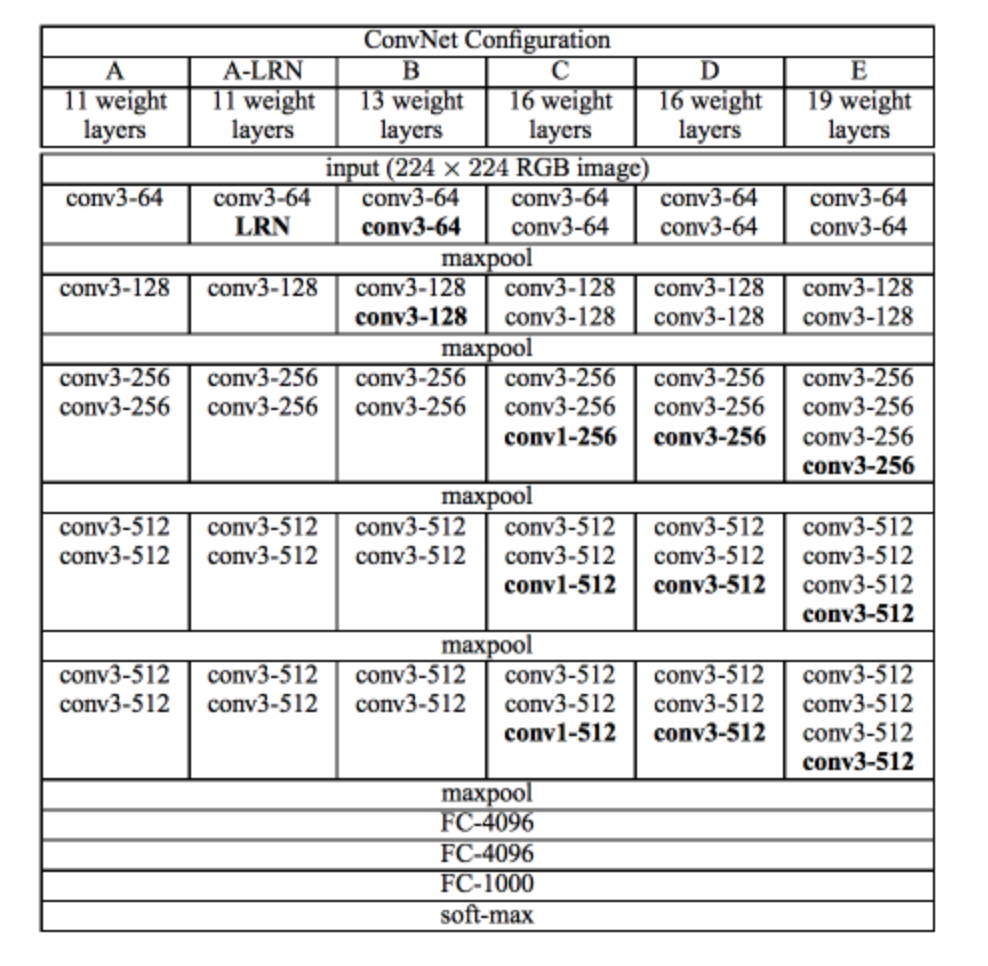

- 구성 D와 E가 층수가 많은 만큼 더 복잡한 모델이다.
- VGGNet의 모든 합성곱층은 3*3 필터와, 스트라이드, 패딩 각각 1이 적용
  - AlexNet과 달리 합성곱층 필터를 줄인 이유는 더 세밀한 특징을 추출하기 위해서이다.
  - 수용영역의 크기가 같을 때 크기가 큰 하나의 커널보다 크기가 작은 커널을 여러 개 쌓는 쪽이 더 성능이 높다.
        - 커널을 여러 개 쌓으며 비선형층을 늘리는 것이 신경망의 층수를 늘리는 것과 동일한 효과가 있기 때문이다.

# Lib Import

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from torchsummary import summary

# Model Implementation

In [14]:
#VGG16의 feature layer
layer_configs = {
    "D" : [(3,64), (3,64), 'M', (3,128), (3,128), 'M', (3,256), (3,256), (3,256), 'M', (3,512), (3,512), (3,512), 'M', (3,512), (3,512), (3,512), 'M']
} 

class VGGNet(nn.Module):
    def __init__(self, in_channels, num_classes, layer_config = "D"):
        super().__init__()
        layer = layer_configs[layer_config]
        self.feature_layer = make_layer(in_channels,layer)
        self.avgpool = torch.nn.AdaptiveAvgPool2d((7,7))
        self.classifier = nn.Sequential(
            nn.Linear(7*7*512,4096),
            nn.ReLU(inplace = True),
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU(inplace = True),
            nn.Dropout(0.5),
            nn.Linear(4096,num_classes)
        )
    def forward(self,x):
        x = self.feature_layer(x)
        x = self.avgpool(x)
        x = torch.flatten(x,1)
        return self.classifier(x)


def make_layer(in_channels, layers):
    # 초기화
    modules, in_channels = [], in_channels
    #
    for layer_type in layers:
        if layer_type == 'M':
            modules.append(nn.MaxPool2d(kernel_size=2,stride=2))
        else:
            k, out_channels = layer_type
            modules.append(nn.Conv2d(in_channels,out_channels,kernel_size=k,padding=1))
            modules.append(nn.ReLU(inplace = True))
            in_channels = out_channels
    return nn.Sequential(*modules)

## model summary

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = VGGNet(3,1000).to(device)

In [17]:
summary(model, input_size=(3,227,227),device ='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 227, 227]           1,792
              ReLU-2         [-1, 64, 227, 227]               0
            Conv2d-3         [-1, 64, 227, 227]          36,928
              ReLU-4         [-1, 64, 227, 227]               0
         MaxPool2d-5         [-1, 64, 113, 113]               0
            Conv2d-6        [-1, 128, 113, 113]          73,856
              ReLU-7        [-1, 128, 113, 113]               0
            Conv2d-8        [-1, 128, 113, 113]         147,584
              ReLU-9        [-1, 128, 113, 113]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

# 다시 구현
vgg11

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from torchsummary import summary

In [12]:
v11_config = [64,'M',128,'M',256,256,'M',512,512,'M',512,512,'M']

In [13]:
def make_layer(conf):
    layers=[]
    in_channels = 3
    for i in conf:
        if i == 'M':
            layers.append(nn.MaxPool2d(2))
        else:
            layers.append(nn.Sequential(
                nn.Conv2d(in_channels, i , kernel_size=3,padding=1),
                nn.BatchNorm2d(i),
                nn.ReLU(inplace = True)
            ))
            in_channels = i
    return nn.Sequential(*layers)

In [14]:
class VGG(nn.Module):
    def __init__(self,feature):
        super().__init__()
        self.features = feature
        self.avgpool = nn.AdaptiveAvgPool2d(7)
        self.classifier = nn.Sequential(
            nn.Linear(512*7*7,4096),
            nn.ReLU(inplace = True),
            nn.Dropout(0.5),
            nn.Linear(4096,4096),
            nn.ReLU(inplace = True),
            nn.Dropout(0.5),
            nn.Linear(4096,2),
        )
    def forward(self , x):
        x = self.features(x)
        x = self.avgpool(x)
        return self.classifier(x.view(x.size(0),-1))

In [15]:
model = VGG(make_layer(v11_config))

In [16]:
model

VGG(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (5): Sequential(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d

In [17]:
summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
       BatchNorm2d-6        [-1, 128, 112, 112]             256
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
      BatchNorm2d-10          [-1, 256, 56, 56]             512
             ReLU-11          [-1, 256, 56, 56]               0
           Conv2d-12          [-1, 256, 56, 56]         590,080
      BatchNorm2d-13          [-1, 256, 56, 56]             512
             ReLU-14          [-1, 256,

In [18]:
import torchvision.models as models

In [19]:
pre_model = models.vgg11_bn(pretrained = True)

/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/goodyoung/Desktop/GIt/myMLstudy/.mlvenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /Users/goodyoung/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|████████████████████████████████████████| 507M/507M [00:56<00:00, 9.46MB/s]
